# Rough Document Where I Learn More About the Data
##### This document can be ignored

In [1]:
#Importing the necessary packages and uploading the CSV files as dataframes.

import pandas as pd
import sqldf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

cd= pd.read_csv('customer_data.csv') #Uploading customer data as a dataframe cd

od= pd.read_csv('order_data.csv') #Uploading order data as a dataframe od

opd= pd.read_csv('order_product_data.csv') #Uploading order product data as a dataframe opd

prod= pd.read_csv('product_data.csv') #Uploading product data as a dataframe prod

In [4]:
print(prod.head(5))

   Unnamed: 0                        product_id  number_of_photos   category
0           0  1e9e8ef04dbcff4541ed26657ea517e5                 1  perfumery
1           1  6a2fb4dd53d2cdb88e0432f1284a004c                 2  perfumery
2           2  0d009643171aee696f4733340bc2fdd0                 1  perfumery
3           3  b1eae565a61935e0011ee7682fef9dc9                 2  perfumery
4           4  8da90b37f0fb171b4877c124f965b1f6                 3  perfumery


In [5]:
prod.columns

Index(['Unnamed: 0', 'product_id', 'number_of_photos', 'category'], dtype='object')

In [6]:
prod.dtypes

Unnamed: 0           int64
product_id          object
number_of_photos     int64
category            object
dtype: object

In [65]:
### Read Headers 
#prod.columns

#Read each Column
# print(prod['category'][0:7])

#Read each Row
#print(prod.iloc[0:4]) 
#prod.loc[prod['category']=='perfumery']

#Stats
prod.describe()

,Unnamed: 0,number_of_photos
count,32328.000000,32328.000000
mean,16163.500000,2.188815
std,9332.434088,1.736746
min,0.000000,1.000000
25%,8081.750000,1.000000
50%,16163.500000,1.000000
75%,24245.250000,3.000000
max,32327.000000,20.000000


#### Used similar commands as above to learn more about the other dataframes as well

In [66]:
# Define a SQL (SQLite3) query
query = """
SELECT *
FROM prod
WHERE category!='perfumery';
"""

# Run the query
df_view = sqldf.run(query)

print(df_view)

       index  Unnamed: 0                        product_id  number_of_photos  \
0        868         868  3aa071139cb16b67ca9e5dea641aaa2f                 1   
1        869         869  cbaff83e2c00a2b731d27276bbf52082                 6   
2        870         870  aedb7e30007f6051c5b3f97156b0848a                 1   
3        871         871  b0694770dbbfebe2d48cd288cfce2f85                 1   
4        872         872  056d07eb7d9c446e3780a3a7f102190d                 1   
...      ...         ...                               ...               ...   
31455  32323       32323  13b25797ad1e6d6c7cd3cbeb35f8ee7a                 1   
31456  32324       32324  dc36a7859b743d8610a2bbbaea26ece9                 2   
31457  32325       32325  107fde0930956120d1e13dd1062fbb46                 1   
31458  32326       32326  726b4e18f00255e2e63491bcba3f60b8                 1   
31459  32327       32327  1dceebcc5f23c02ea23e16d5bedca000                 2   

        category  
0            art  
1

In [67]:
# Define a SQL (SQLite3) query
query = """
SELECT max(price) from opd;
"""

# Run the query
df_view = sqldf.run(query)

print(df_view)

   max(price)
0      6735.0


In [68]:
# Define a SQL (SQLite3) query
query = """
SELECT *
from opd
where price>=6735;
"""

# Run the query
df_view = sqldf.run(query)

print(df_view)

   index  Unnamed: 0                          order_id  num_items_in_order  \
0   3556        3556  0812eb902a67711a1cb742b3cdaa65ae                   1   

                         product_id   price  shipping  
0  489ae2aa008f021502940f251d4cce7f  6735.0    194.31  


In [69]:
# Define a SQL (SQLite3) query
query = """
SELECT DISTINCT(category)
from prod;
"""

# Run the query
df_view = sqldf.run(query)

print(df_view)

                    category
0                  perfumery
1                        art
2                     sports
3                       baby
4                       home
5                      music
6              miscellaneous
7                  furniture
8                       toys
9         construction_tools
10     computers_accessories
11             health_beauty
12       luggage_accessories
13              garden_tools
14          office_furniture
15                      auto
16               electronics
17             fashion_shoes
18                    phones
19                stationery
20       fashion_accessories
21                 computers
22                   watches
23                  pet_shop
24               industrials
25          air_conditioning
26                     games
27                     books
28   costruction_tools_tools
29   fashion_underwear_beach
30              fashion_male
31            party_supplies
32                food_drink
33  costructio

# Need to remove cancelled orders from the below #

In [70]:
# Define a SQL (SQLite3) query
query = """
SELECT prod.category, sum(opd.price)
from opd
left join prod
on opd.product_id=prod.product_id
group by prod.category
order by 2 desc;
"""

# Run the query
df_view = sqldf.run(query)

print(df_view)

                    category  sum(opd.price)
0                  furniture      1906392.96
1              health_beauty      1258681.34
2                       home      1206252.65
3                    watches      1205005.68
4                     sports       988048.97
5      computers_accessories       911954.32
6              miscellaneous       685461.84
7                       auto       592720.11
8               garden_tools       485256.46
9                       toys       483946.60
10                      baby       413332.48
11                 perfumery       399124.87
12                    phones       383250.53
13          office_furniture       273960.70
14                stationery       238471.64
15        construction_tools       226302.11
16                 computers       222963.13
17                  pet_shop       214315.41
18                     music       204262.62
19                      None       185049.76
20               electronics       160246.74
21        

In [72]:
# Define a SQL (SQLite3) query
query = """
SELECT distinct(order_status)
from od
"""

# Run and print the query
print(sqldf.run(query))

  order_status
0    delivered
1     invoiced
2      shipped
3   processing
4  unavailable
5     canceled
6      created
7     approved


## Total # of Unique Customers: 95, 560

In [76]:
# Define a SQL (SQLite3) query
query = """
SELECT count(distinct(customer_unique_id))
from od
left join cd 
on cd.customer_order_id=od.customer_order_id
where od.order_status!='canceled'
"""

# Run and print the query
print(sqldf.run(query))

   count(distinct(customer_unique_id))
0                                95560


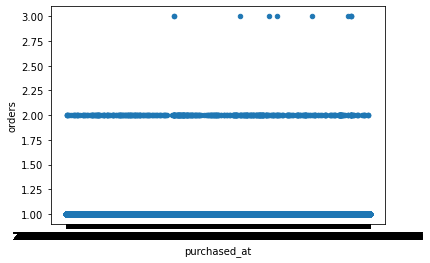

In [99]:
# Define a SQL (SQLite3) query
query = """
SELECT count(order_id) as orders, purchased_at
from od
where od.order_status!='canceled'
group by purchased_at
--having count(order_id)>2
order by 2 asc

"""

# Run and print the query
df_view = sqldf.run(query)
#print(df_view)

df_view.plot(x ='purchased_at', y='orders', kind = 'scatter')

#plt.show()

In [100]:
plt.show()

In [7]:
# Define a SQL (SQLite3) query
query = """
SELECT min(purchased_at), max(purchased_at)
from od
"""

# Run and print the query
df_view = sqldf.run(query)
print(df_view)

     min(purchased_at)    max(purchased_at)
0  2016-09-04 21:15:19  2018-10-17 17:30:18


In [36]:
# Define a SQL (SQLite3) query
query = """
SELECT *, strftime('%m-%Y', purchased_at) as MonthYear
from od
"""

# Run and print the query
odmy = sqldf.run(query) #Order data with the MonthYear column
#print(odq)

In [26]:
# Define a SQL (SQLite3) query
query = """
SELECT count(order_id), Quartile
-- SELECT count(order_id) as total_orders, ntile(3) over (partition by strftime('%Y', purchased_at) order by purchased_at) as Quarter
from odq
group by Quartile
order by Quartile
"""

# Run and print the query
df_view = sqldf.run(query) #Order data with quartile
print(df_view)

   count(order_id)  Quartile
0            12431         1
1            12430         2
2            12430         3
3            12430         4
4            12430         5
5            12430         6
6            12430         7
7            12430         8
